## 2nd Partial Project

In [1]:
%matplotlib notebook
from roboticstoolbox import DHRobot, RevoluteDH
import roboticstoolbox as rtb
from math import pi
from spatialmath import SE3
#link1
m1 = 1
#link2
m2 = 1
#link3
m3 = 1
#link4
m4 = 1
#link5
m5 = 1
#link6
m6 = 1
l6 = 0
#link7
m7=1
#link8
m8=1
g = 9.81 # gravity
L1 = RevoluteDH(m=m1, a=13.92, alpha=-pi/2, d=40.28, qlim=[0, 2*pi])
L2 = RevoluteDH(offset=-pi/2, m=m2, d=0 , alpha=0, a=0, qlim=[0, 2*pi])
L3 = RevoluteDH(m=m3, d=2.83, alpha=pi/2, a=119.97, qlim=[0, 2*pi])
L4 = RevoluteDH(offset=-pi/2,m=m4, d=-5.5, alpha=-pi/2, a=89.75, qlim=[0, 2*pi])
L5 = RevoluteDH(offset=pi/2,m=m5, d=0, alpha=0, a=0, qlim=[0, 2*pi])
L6 = RevoluteDH(m=m6, d=28, alpha=pi/2, a=14.07, qlim=[0, 2*pi])
L7 = RevoluteDH(offset=-pi/2,m=m7, d=0, alpha=-pi/2, a=l6, qlim=[0, 2*pi])
L8 = RevoluteDH(m=m8, d=-9.25, alpha=pi/2, a=38, qlim=[0, 2*pi])

robot1 = DHRobot([L1,L2,L3,L4,L5,L6,L7,L8], gravity=[0, 0, g], name="Robot")
print(robot1) # shows dh table

DHRobot: Robot, 8 joints (RRRRRRRR), dynamics, standard DH parameters
┌──────────┬───────┬───────┬────────┬──────┬────────┐
│   θⱼ     │  dⱼ   │  aⱼ   │   ⍺ⱼ   │  q⁻  │   q⁺   │
├──────────┼───────┼───────┼────────┼──────┼────────┤
│ q1       │ 40.28 │ 13.92 │ -90.0° │ 0.0° │ 360.0° │
│ q2 - 90° │     0 │     0 │   0.0° │ 0.0° │ 360.0° │
│ q3       │  2.83 │   120 │  90.0° │ 0.0° │ 360.0° │
│ q4 - 90° │  -5.5 │ 89.75 │ -90.0° │ 0.0° │ 360.0° │
│ q5 + 90° │     0 │     0 │   0.0° │ 0.0° │ 360.0° │
│ q6       │    28 │ 14.07 │  90.0° │ 0.0° │ 360.0° │
│ q7 - 90° │     0 │     0 │ -90.0° │ 0.0° │ 360.0° │
│ q8       │ -9.25 │    38 │  90.0° │ 0.0° │ 360.0° │
└──────────┴───────┴───────┴────────┴──────┴────────┘

┌─┬──┐
└─┴──┘



<IPython.core.display.Javascript object>


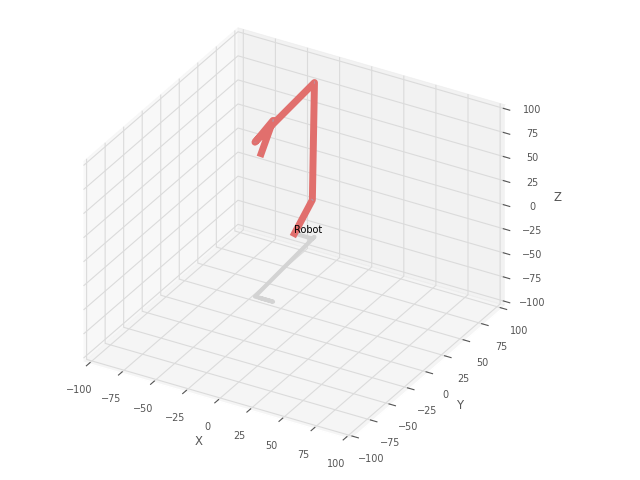

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Robot')

In [10]:
robot1.addconfiguration('q_init', [0,0,0,0,0,0,0,0])
robot1.plot(robot1.configs['q_init'],limits=[-100, 100, -100, 100,-100, 100])

In [9]:
robot1.addconfiguration('q_end', [pi/3,pi/4,pi/18,0,pi/5,pi/4,pi/3,0])
robot1.plot(robot1.configs['q_end'],limits=[-100, 100, -100, 100,-100, 100])

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Robot')

<IPython.core.display.Javascript object>


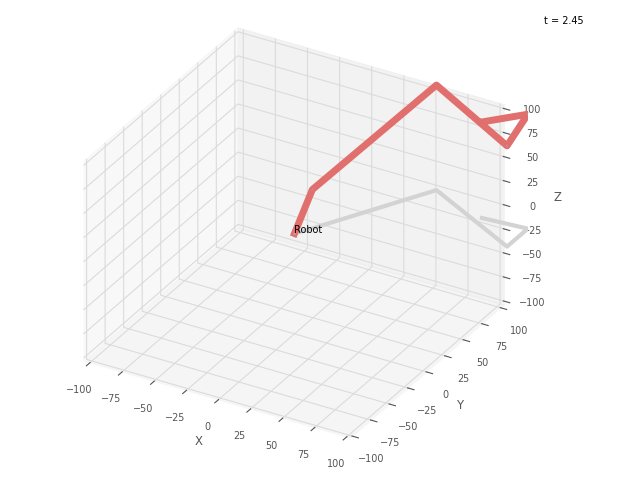

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.0, 0.0, 'Robot')

In [7]:
qt1 = rtb.jtraj(robot1.configs['q_init'], robot1.configs['q_end'], 50)
robot1.plot(qt1.q,limits=[-100, 100, -100, 100,-100, 100])

In [28]:
import matplotlib.pyplot as plt
import numpy as np
pos = qt1.q
vel = qt1.qd
acc = qt1.qdd
time = qt1.t*5/100

<IPython.core.display.Javascript object>


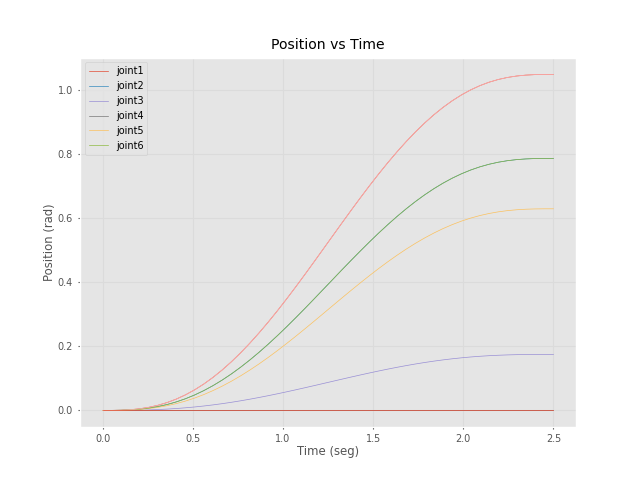

In [29]:
plt.plot(time,pos)
plt.title("Position vs Time")
plt.xlabel("Time (seg)")
plt.ylabel("Position (rad)")
plt.legend(['joint1','joint2','joint3','joint4','joint5','joint6'])
plt.show()

<IPython.core.display.Javascript object>


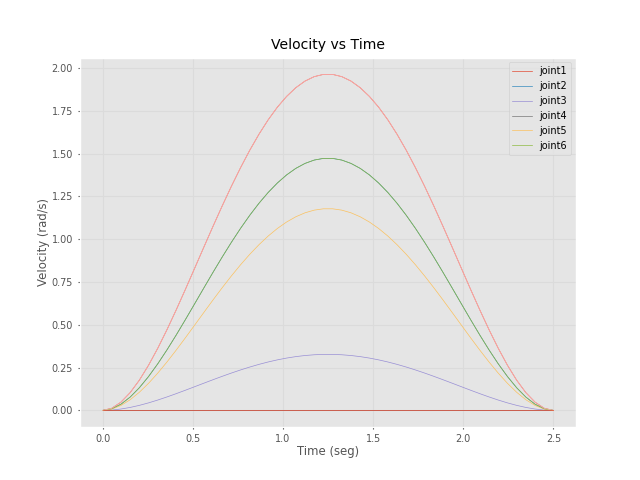

In [30]:
plt.plot(time,vel)
plt.title("Velocity vs Time")
plt.xlabel("Time (seg)")
plt.ylabel("Velocity (rad/s)")
plt.legend(['joint1','joint2','joint3','joint4','joint5','joint6',])
plt.show()

<IPython.core.display.Javascript object>


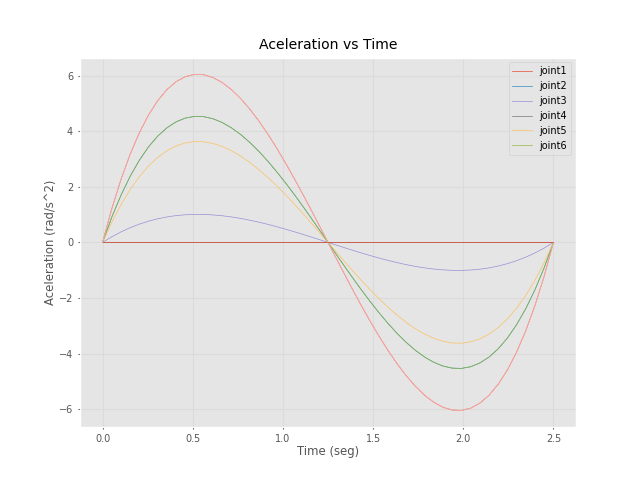

In [31]:
plt.plot(time,acc)
plt.title("Aceleration vs Time")
plt.xlabel("Time (seg)")
plt.ylabel("Aceleration (rad/s^2)")
plt.legend(['joint1','joint2','joint3','joint4','joint5','joint6',])
plt.show()

## Obteining the Jacobian

In [12]:
import numpy as np
from numpy import cos, sin, pi

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sympy as sp

# list of DH parameters
# Structure is d, theta, a, alpha in each row

# The theta angles are also referred to as qi

# Tells the code how many joint values to expect
DOF = 6

q1, q2, q3, q4, q5, q6,q7,q8 = sp.symbols('q1 q2 q3 q4 q5 q6 q7 q8')

# Value of pi from the symbolic library for convenience
spi = sp.pi

# Define DH table

DH_params = []
# Structure is d, theta, a, alpha in each row
DH_params.append([ 40.28 , q1,  13.92  , -spi/2 ])
DH_params.append([  0  , q2, 0.22, 0   ])
DH_params.append([  2.83  , q3,  119.97  , spi/2 ])
DH_params.append([-5.5 , q4,  89.75  , -spi/2])
DH_params.append([  0  , q5,  0  , 0 ])
DH_params.append([28 , q6,  14.07  , spi/2 ])
DH_params.append([0 , q7,  0  , -spi/2 ])
DH_params.append([-9.25 , q8,  38  , spi/2 ])

DH_params

In [13]:
# Using the combined DH transformation matrix
def DH_trans_matrix(params):
    
    d, theta, a, alpha = (params[0], params[1], params[2], params[3])
    
    mat = sp.Matrix([[sp.cos(theta), -1*sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha),    a*sp.cos(theta)],
                    [sp.sin(theta), sp.cos(theta)*sp.cos(alpha),    -1*sp.cos(theta)*sp.sin(alpha), a*sp.sin(theta)],
                    [0,             sp.sin(alpha),                  sp.cos(alpha),                  d],
                    [0,             0,                              0,                              1]])
    
    return mat

# Get the transformations from the origin to each of the joints and the end effector
def joint_transforms(DH_params):
    transforms = []

    transforms.append(sp.eye(4)) #Assuming the first first joint is at the origin

    for el in DH_params:

        transforms.append(DH_trans_matrix(el))

    return transforms

# To get the jacobain we can use the cross product method since we have all of the transformations

# Get the total transformation to the end effector
# This function gives the symbolic expression for the jacobian
def jacobian_expr(DH_params):

    transforms = joint_transforms(DH_params)

    trans_EF = transforms[0]

    for mat in transforms[1:]:

        trans_EF = trans_EF * mat

    pos_EF = trans_EF[0:3,3]

    J = sp.zeros(6, DOF)

    for joint in range(DOF):

        trans_joint = transforms[0]

        for mat in transforms[1:joint+1]:

            trans_joint = trans_joint*mat

        z_axis = trans_joint[0:3,2]

        pos_joint = trans_joint[0:3,3]

        Jv = z_axis.cross(pos_EF - pos_joint)

        Jw = z_axis

        J[0:3,joint] = Jv
        J[3:6,joint] = Jw

    J = sp.simplify(J)
    return J

# This function evaluates a symbolic jacobian expression using provided joint angles
def jacobian_subs(joints, jacobian_sym):
    
    # Convert to list if it's an ndarray
    if (isinstance(joints, np.ndarray)):
        joints = joints.flatten().tolist()
    
    J_l = jacobian_sym
    
    J_l = J_l.subs(q1, joints[0])
    J_l = J_l.subs(q2, joints[1])
    J_l = J_l.subs(q3, joints[2])
    J_l = J_l.subs(q4, joints[3])
    J_l = J_l.subs(q5, joints[4])
    J_l = J_l.subs(q6, joints[5])
    J_l = J_l.subs(q7, joints[6])
    J_l = J_l.subs(q8, joints[7])
        
    
    return J_l

In [14]:
# Verify the two previous functions

# If you're trying to implement the jacobian, you can just take the symbolic jacobian that's printed and hard
# code that into your model

jacobian_symbolic = jacobian_expr(DH_params)

jacobian_symbolic

⎡38.0⋅sin(q₁)⋅sin(q₄)⋅sin(q₇)⋅cos(q₈)⋅cos(q₂ + q₃) - 9.25⋅sin(q₁)⋅sin(q₄)⋅cos(
⎢                                                                             
⎢-9.25⋅sin(q₁)⋅sin(q₄)⋅sin(q₇)⋅cos(q₅ + q₆) + 38.0⋅sin(q₁)⋅sin(q₄)⋅sin(q₈)⋅sin
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

q₇)⋅cos(q₂ + q₃) + 28.0⋅sin(q₁)⋅sin(q₄)⋅cos(q₂ + q₃) + 9.25⋅sin(q₁)⋅sin(q₇)⋅si
                                                   

<IPython.core.display.Javascript object>


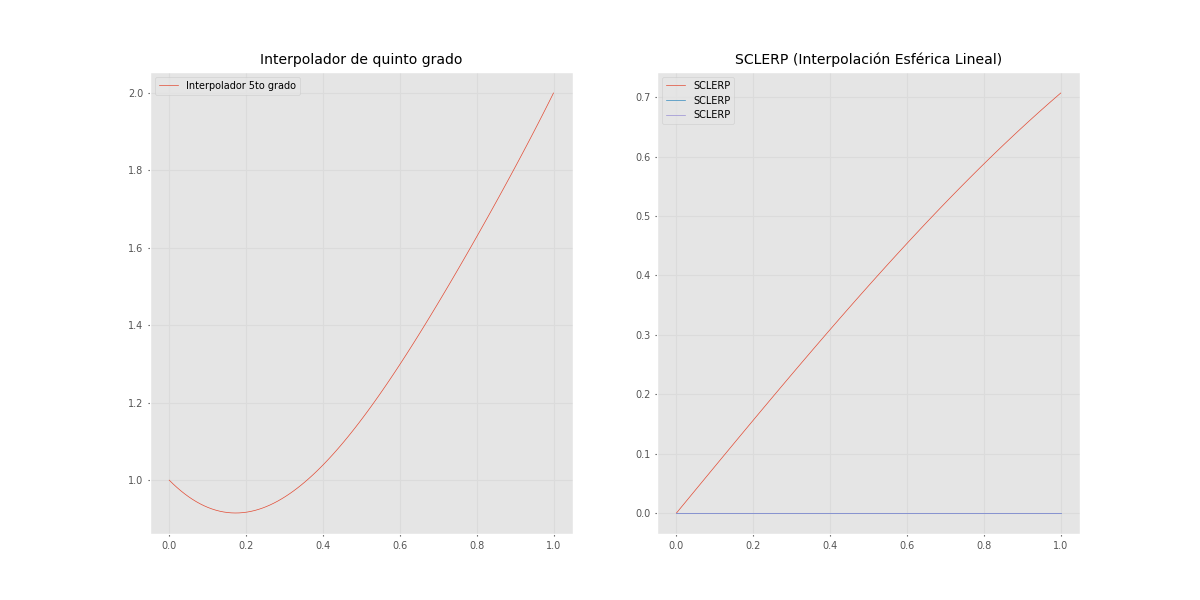

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Ecuación del interpolador de quinto grado
def interpolador_quinto_grado(t, coeficientes):
    return np.polyval(coeficientes, t)

# Ecuación de SCLERP (Spherical Linear Interpolation)
def sclerp(q1, q2, t):
    dot_product = np.dot(q1, q2)
    dot_product = max(-1.0, min(1.0, dot_product))
    omega = np.arccos(dot_product)
    sin_omega = np.sin(omega)

    if sin_omega == 0.0:
        return (1.0 - t) * q1 + t * q2

    return (np.sin((1.0 - t) * omega) / sin_omega) * q1 + (np.sin(t * omega) / sin_omega) * q2

# Ejemplo de uso para el interpolador de quinto grado
t_values = np.linspace(0, 1, 100)
coeficientes = np.array([1, -2, 0, 3, -1, 1])  # Coeficientes arbitrarios
interpolacion_quinto_grado = interpolador_quinto_grado(t_values, coeficientes)

# Ejemplo de uso para SCLERP
q1 = np.array([1, 0, 0, 0])  # Cuaternión identidad
q2 = np.array([0.7071, 0.7071, 0, 0])  # Cuaternión de rotación
sclerp_interpolations = np.array([sclerp(q1, q2, t) for t in t_values])

# Graficar resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, interpolacion_quinto_grado, label='Interpolador 5to grado')
plt.title('Interpolador de quinto grado')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_values, sclerp_interpolations[:, 1:], label='SCLERP')
plt.title('SCLERP (Interpolación Esférica Lineal)')
plt.legend()

plt.show()


<IPython.core.display.Javascript object>


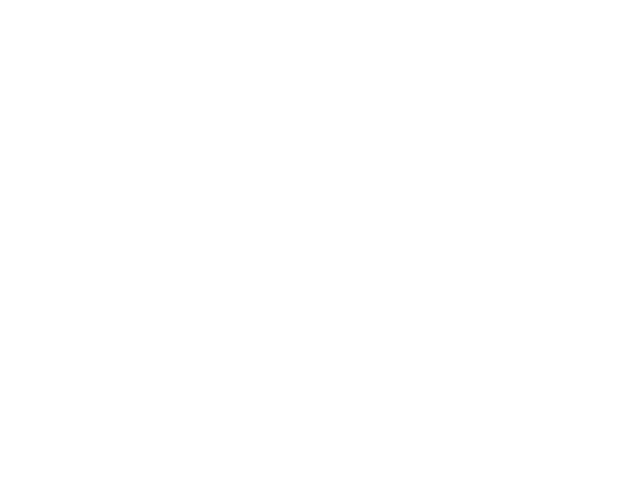

ValueError: incorrect vector length: expected 6, got 3

<IPython.core.display.Javascript object>


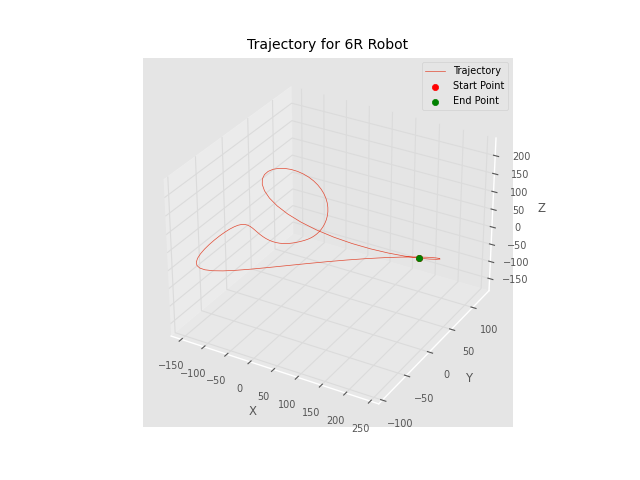

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir parámetros del robot 6R (longitudes de los eslabones)
a1, a2, a3, a4, a5, a6 = 13.92, 0, 119.97, 89.75, 0, 14.07

# Función para calcular la matriz de transformación homogénea DH
def dh_matrix(theta, d, a, alpha):
    matrix = np.array([
        [np.cos(theta), -np.sin(theta) * np.cos(alpha), np.sin(theta) * np.sin(alpha), a * np.cos(theta)],
        [np.sin(theta), np.cos(theta) * np.cos(alpha), -np.cos(theta) * np.sin(alpha), a * np.sin(theta)],
        [0, np.sin(alpha), np.cos(alpha), d],
        [0, 0, 0, 1]
    ])
    return matrix

# Función para realizar la cinemática directa
def forward_kinematics(theta_values):
    # Definir ángulos y desplazamientos para cada articulación
    theta1, theta2, theta3, theta4, theta5, theta6 = theta_values
    d_values = [40.28, 0, 2.83, -5.5, 0, 28]

    # Matrices de transformación homogénea para cada articulación
    A1 = dh_matrix(theta1, d_values[0], a1, -np.pi / 2)
    A2 = dh_matrix(theta2, d_values[1], a2, 0)
    A3 = dh_matrix(theta3, d_values[2], a3, np.pi / 2)
    A4 = dh_matrix(theta4, d_values[3], a4, -np.pi / 2)
    A5 = dh_matrix(theta5, d_values[4], a5, np.pi / 2)
    A6 = dh_matrix(theta6, d_values[5], a6, 0)

    # Calcular la matriz de transformación homogénea total
    total_transform = A1 @ A2 @ A3 @ A4 @ A5 @ A6

    # Extraer las posiciones x, y, z de la matriz de transformación
    x = total_transform[0, 3]
    y = total_transform[1, 3]
    z = total_transform[2, 3]

    return x, y, z

# Generar trayectoria de articulaciones
num_points = 100
theta_values = np.linspace(0, 2 * np.pi, num_points)

# Calcular las posiciones x, y, z correspondientes para cada punto
trajectory = np.array([forward_kinematics([theta, theta, theta, theta, theta, theta]) for theta in theta_values])

# Graficar la trayectoria en el espacio 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], label='Trajectory')
ax.scatter(trajectory[0, 0], trajectory[0, 1], trajectory[0, 2], c='r', marker='o', label='Start Point')
ax.scatter(trajectory[-1, 0], trajectory[-1, 1], trajectory[-1, 2], c='g', marker='o', label='End Point')
ax.legend()
ax.set_title('Trajectory for 6R Robot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


ValueError: cannot reshape array of size 1 into shape (6)

Angulos: [ 0.78539816  1.04719755  1.57079633 -1.57079633  1.04719755  0.78539816]
Matriz de Transformación Homogénea:
   0.5       0.7071   -0.5       41.99     
   0.5      -0.7071   -0.5       6.396     
  -0.7071    0        -0.7071    1.41      
   0         0         0         1         


Posición (x, y, z):
x = 41.9921, y = 6.3964, z = 1.4097


<IPython.core.display.Javascript object>


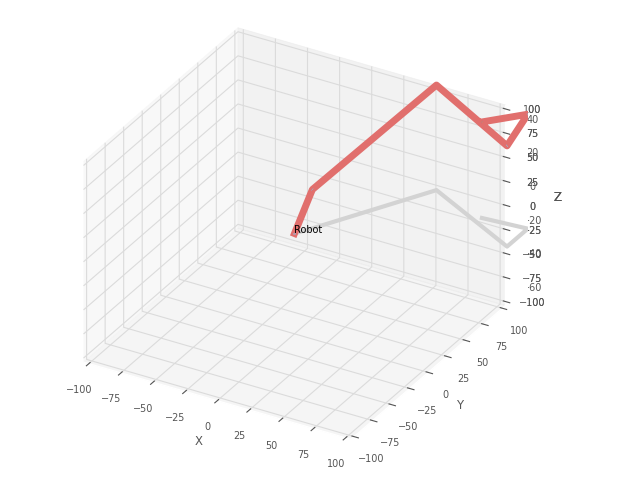

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from roboticstoolbox import DHRobot, RevoluteDH
from spatialmath import SE3

# Definir parámetros del robot 6R (longitudes de los eslabones)
# Crear un robot 6R utilizando RevoluteDH
#link1
m1 = 1
#link2
m2 = 1
#link3
m3 = 1
#link4
m4 = 1
#link5
m5 = 1
#link6
m6 = 1
l6 = 0
#link7
m7=1
#link8
m8=1
g = 9.81 # gravity
L1 = RevoluteDH(m=m1, a=13.92, alpha=-pi/2, d=40.28, qlim=[0, 2*pi])
L2 = RevoluteDH(offset=-pi/2, m=m2, d=0 , alpha=0, a=0, qlim=[0, 2*pi])
L3 = RevoluteDH(m=m3, d=2.83, alpha=pi/2, a=119.97, qlim=[0, 2*pi])
L4 = RevoluteDH(offset=-pi/2,m=m4, d=-5.5, alpha=-pi/2, a=89.75, qlim=[0, 2*pi])
L5 = RevoluteDH(offset=pi/2,m=m5, d=0, alpha=0, a=0, qlim=[0, 2*pi])
L6 = RevoluteDH(m=m6, d=28, alpha=pi/2, a=14.07, qlim=[0, 2*pi])

robot = DHRobot([L1,L2,L3,L4,L5,L6], gravity=[0, 0, g], name="Robot")

# Definir ángulos de las articulaciones (en radianes)
q = np.array([np.pi/4, np.pi/3, np.pi/2, -np.pi/2, np.pi/3, np.pi/4])
print("Angulos:" ,q)
# Calcular la cinemática directa para la configuración dada
T = robot.fkine(q)

# Imprimir la matriz de transformación homogénea
print("Matriz de Transformación Homogénea:")
print(T)

# Extraer las posiciones x, y, z de la matriz de transformación
x, y, z = T.t

# Imprimir las posiciones x, y, z
print("\nPosición (x, y, z):")
print(f"x = {x:.4f}, y = {y:.4f}, z = {z:.4f}")

# Graficar el robot en la posición dada
robot.plot(q)

# Mostrar la gráfica
plt.show()


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from roboticstoolbox import DHRobot, RevoluteDH
from spatialmath import SE3

# Crear un robot 6R utilizando RevoluteDH
m1, m2, m3, m4, m5, m6 = 1, 1, 1, 1, 1, 1
L1 = RevoluteDH(m=m1, a=13.92, alpha=-np.pi/2, d=40.28, qlim=[0, 2*np.pi])
L2 = RevoluteDH(offset=-np.pi/2, m=m2, d=0, alpha=0, a=0, qlim=[0, 2*np.pi])
L3 = RevoluteDH(m=m3, d=2.83, alpha=np.pi/2, a=119.97, qlim=[0, 2*np.pi])
L4 = RevoluteDH(offset=-np.pi/2, m=m4, d=-5.5, alpha=-np.pi/2, a=89.75, qlim=[0, 2*np.pi])
L5 = RevoluteDH(offset=np.pi/2, m=m5, d=0, alpha=0, a=0, qlim=[0, 2*np.pi])
L6 = RevoluteDH(m=m6, d=28, alpha=np.pi/2, a=14.07, qlim=[0, 2*np.pi])

robot = DHRobot([L1, L2, L3, L4, L5, L6], name="Robot")

# Definir ángulos de las articulaciones iniciales y finales (en radianes)
q_inicial = np.array([0, 0, 0, 0, 0, 0])
q_final = np.array([np.pi/2, np.pi/4, np.pi/2, -np.pi/2, np.pi/4, np.pi/2])

# Generar trayectoria interpolando con quinto grado
t_values = np.linspace(0, 1, 100)
coeficientes = np.array([1, -2, 0, 3, -1, 1])  # Coeficientes arbitrarios
trayectoria_quinto_grado = np.array([robot.fkine(robot.jtraj(q_inicial, q_final, t)[0]).t for t in t_values])

# Generar trayectoria SCLERP
trayectoria_sclerp = np.array([robot.fkine(robot.ctraj(q_inicial, q_final, t)[0]).t for t in t_values])

# Graficar las trayectorias en el espacio 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(trayectoria_quinto_grado[:, 0], trayectoria_quinto_grado[:, 1], trayectoria_quinto_grado[:, 2], label='Interpolador 5to grado')
ax.plot(trayectoria_sclerp[:, 0], trayectoria_sclerp[:, 1], trayectoria_sclerp[:, 2], label='SCLERP')
ax.scatter(trayectoria_quinto_grado[0, 0], trayectoria_quinto_grado[0, 1], trayectoria_quinto_grado[0, 2], c='r', marker='o', label='Inicio')
ax.scatter(trayectoria_quinto_grado[-1, 0], trayectoria_quinto_grado[-1, 1], trayectoria_quinto_grado[-1, 2], c='g', marker='o', label='Fin')
ax.legend()
ax.set_title('Trayectorias para el Robot 6R')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


ValueError: Tep must be a 4x4 SE3 matrix

<IPython.core.display.Javascript object>


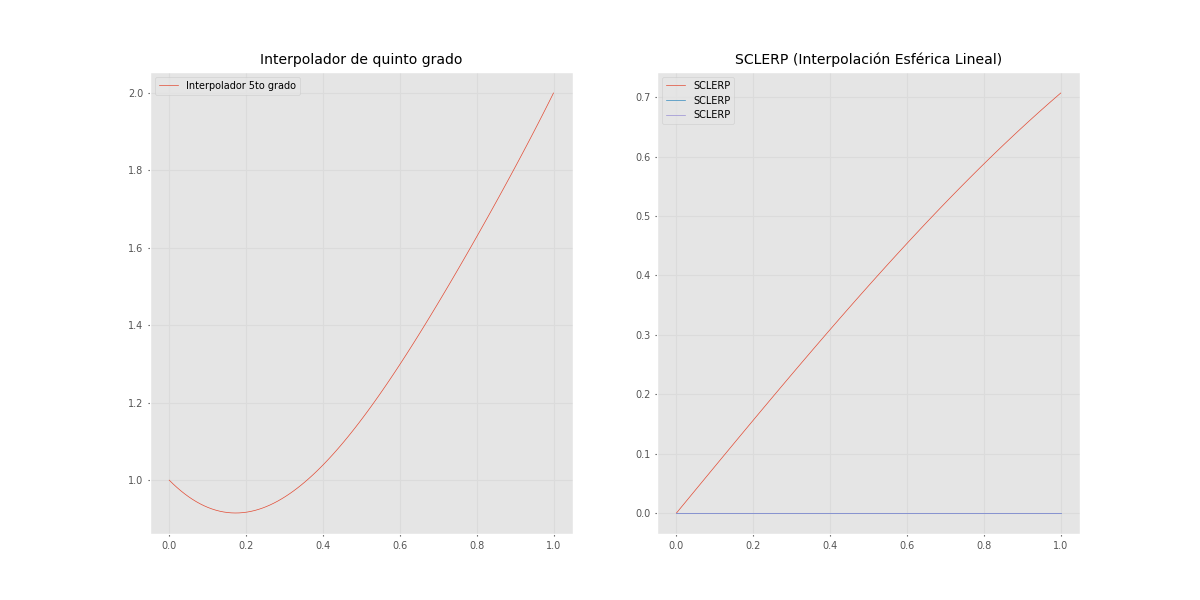

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Ecuación del interpolador de quinto grado
def interpolador_quinto_grado(t, coeficientes):
    return np.polyval(coeficientes, t)

# Ecuación de SCLERP (Spherical Linear Interpolation)
def sclerp(q1, q2, t):
    dot_product = np.dot(q1, q2)
    dot_product = max(-1.0, min(1.0, dot_product))
    omega = np.arccos(dot_product)
    sin_omega = np.sin(omega)

    if sin_omega == 0.0:
        return (1.0 - t) * q1 + t * q2

    return (np.sin((1.0 - t) * omega) / sin_omega) * q1 + (np.sin(t * omega) / sin_omega) * q2

# Ejemplo de uso para el interpolador de quinto grado
t_values = np.linspace(0, 1, 100)
coeficientes = np.array([1, -2, 0, 3, -1, 1])  # Coeficientes arbitrarios
interpolacion_quinto_grado = interpolador_quinto_grado(t_values, coeficientes)

# Ejemplo de uso para SCLERP
q1 = np.array([1, 0, 0, 0])  # Cuaternión identidad
q2 = np.array([0.7071, 0.7071, 0, 0])  # Cuaternión de rotación
sclerp_interpolations = np.array([sclerp(q1, q2, t) for t in t_values])

# Graficar resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, interpolacion_quinto_grado, label='Interpolador 5to grado')
plt.title('Interpolador de quinto grado')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_values, sclerp_interpolations[:, 1:], label='SCLERP')
plt.title('SCLERP (Interpolación Esférica Lineal)')
plt.legend()

plt.show()
